## Introduction

There are many models for **clustering** out there. In this notebook, we will be presenting the model that is considered one of the simplest models amongst them. Despite its simplicity, the **K-means** is vastly used for clustering in many data science applications, especially useful if you need to quickly discover insights from **unlabeled data**. In this notebook, you will learn how to use k-Means for customer segmentation.

Some real-world applications of k-means:
- Customer segmentation
- Understand what the visitors of a website are trying to accomplish
- Pattern recognition
- Machine learning
- Data compression


In this notebook we practice k-means clustering with 2 examples:
- k-means on a random generated dataset
- Using k-means for customer segmentation

<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li><a href="#random_generated_dataset">k-Means on a randomly generated dataset</a></li>
            <ol>
                <li><a href="#setting_up_K_means">Setting up K-Means</a></li>
                <li><a href="#creating_visual_plot">Creating the Visual Plot</a></li>
            </ol>
        <li><a href="#customer_segmentation_K_means">Customer Segmentation with K-Means</a></li>
            <ol>
                <li><a href="#pre_processing">Pre-processing</a></li>
                <li><a href="#modeling">Modeling</a></li>
                <li><a href="#insights">Insights</a></li>
            </ol>
    </ul>
</div>
<br>
<hr>

### Import libraries
Lets first import the required libraries.
Also run <b> %matplotlib inline </b> since we will be plotting in this section.

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
%matplotlib inline

<h1 id="random_generated_dataset">k-Means on a randomly generated dataset</h1>
Lets create our own dataset for this lab!


First we need to set up a random seed. Use <b>numpy's random.seed()</b> function, where the seed will be set to <b>0</b>

<h1 id="customer_segmentation_K_means">Customer Segmentation with K-Means</h1>
Imagine that you have a customer dataset, and you need to apply customer segmentation on this historical data.
Customer segmentation is the practice of partitioning a customer base into groups of individuals that have similar characteristics. It is a significant strategy as a business can target these specific groups of customers and effectively allocate marketing resources. For example, one group might contain customers who are high-profit and low-risk, that is, more likely to purchase products, or subscribe for a service. A business task is to retaining those customers. Another group might include customers from non-profit organizations. And so on.

https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/Cust_Segmentation.csv

### Load Data From CSV File  
Before you can work with the data, you must use the URL to get the Cust_Segmentation.csv.

In [2]:
import pandas as pd
cust_df = pd.read_csv("D:\My Documents\Machine Learning\DataSets/Cust_Segmentation.csv")
cust_df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


<h2 id="pre_processing">Pre-processing</h2

As you can see, __Address__ in this dataset is a categorical variable. k-means algorithm isn't directly applicable to categorical variables because Euclidean distance function isn't really meaningful for discrete variables. So, lets drop this feature and run clustering.

In [3]:
df = cust_df.drop('Address', axis=1)
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [4]:
cust_df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


#### Normalizing over the standard deviation
Now let's normalize the dataset. But why do we need normalization in the first place? Normalization is a statistical method that helps mathematical-based algorithms to interpret features with different magnitudes and distributions equally. We use __StandardScaler()__ to normalize our dataset.

In [5]:
from sklearn.preprocessing import StandardScaler
X = df.values[:,1:]# [allrows,1stcol :till end]
X

array([[41.   ,  2.   ,  6.   , ...,  1.073,  0.   ,  6.3  ],
       [47.   ,  1.   , 26.   , ...,  8.218,  0.   , 12.8  ],
       [33.   ,  2.   , 10.   , ...,  5.802,  1.   , 20.9  ],
       ...,
       [25.   ,  4.   ,  0.   , ...,  3.21 ,  1.   , 33.4  ],
       [32.   ,  1.   , 12.   , ...,  0.696,  0.   ,  2.9  ],
       [52.   ,  1.   , 16.   , ...,  3.638,  0.   ,  8.6  ]])

In [6]:
X = np.nan_to_num(X)

Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[ 0.74291541,  0.31212243, -0.37878978, ..., -0.59048916,
        -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 , ...,  1.51296181,
        -0.52379654,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  0.80170393,
         1.90913822,  1.59755385],
       ...,
       [-1.24795149,  2.46906604, -1.26454304, ...,  0.03863257,
         1.90913822,  3.45892281],
       [-0.37694723, -0.76634938,  0.50696349, ..., -0.70147601,
        -0.52379654, -1.08281745],
       [ 2.1116364 , -0.76634938,  1.09746566, ...,  0.16463355,
        -0.52379654, -0.2340332 ]])

<h2 id="modeling">Modeling</h2>

In our example (if we didn't have access to the k-means algorithm), it would be the same as guessing that each customer group would have certain age, income, education, etc, with multiple tests and experiments. However, using the K-means clustering we can do all this process much easier.

Lets apply k-means on our dataset, and take look at cluster labels.

In [48]:
clusterNum = 4
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 100)
k_means.fit(X)#training 
labels = k_means.labels_
print(labels)
#300 300 (0,1,2)

[0 3 2 0 1 2 2 2 0 3 2 0 0 0 0 0 0 0 2 0 0 0 0 2 3 2 0 0 2 0 3 2 0 0 0 0 0
 0 0 3 0 3 0 3 0 2 0 0 0 2 2 0 0 2 2 0 0 0 2 0 2 0 2 2 0 0 2 0 0 0 2 2 3 0
 0 0 2 0 3 2 2 2 3 0 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 0 0 3 2 2 0 2 0 0 2 2 2
 0 0 0 0 0 0 2 2 0 0 0 0 2 0 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 0 0 0 0 2 0 2 0
 0 0 0 0 0 0 2 0 3 3 0 2 0 0 2 2 0 0 2 0 0 2 2 0 0 0 0 0 2 0 0 2 2 0 0 3 0
 0 0 0 0 2 0 0 2 0 2 0 0 2 1 0 3 0 0 0 0 2 0 1 3 0 0 2 2 2 0 0 2 2 2 2 0 3
 0 0 0 0 3 0 0 2 0 0 2 0 2 0 0 0 2 0 0 0 0 0 0 3 2 2 0 0 0 0 0 0 2 0 0 0 0
 0 0 2 2 2 2 0 0 2 0 0 0 0 0 2 0 0 0 2 0 0 0 3 3 0 3 0 2 0 3 2 0 0 0 0 0 0
 0 0 0 2 2 2 0 0 0 2 2 0 0 0 2 0 0 0 2 0 0 0 0 0 2 0 3 0 0 2 0 0 3 2 2 3 0
 0 2 0 0 2 0 2 0 2 0 0 2 0 0 2 0 0 3 0 0 0 0 0 3 0 0 0 3 0 0 0 2 0 2 3 3 2
 0 0 2 0 0 0 0 0 0 0 0 0 0 0 3 0 2 0 0 0 0 2 0 0 0 0 0 3 0 0 0 0 0 0 0 2 0
 2 3 0 0 2 0 0 0 0 2 0 2 0 2 2 0 0 2 0 0 0 0 0 2 0 0 0 2 0 0 0 2 2 2 0 0 1
 2 0 2 2 2 0 2 0 0 0 3 0 0 0 0 2 0 3 0 0 0 0 2 0 2 2 2 0 2 3 2 0 2 0 0 0 2
 0 2 0 0 0 0 3 0 0 0 2 0 

<h2 id="insights">Insights</h2>
We assign the labels to each row in dataframe.

In [49]:
df["Class Example Belongs to"] = labels
df.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Class Example Belongs to
0,41,2,6,19,0.124,1.073,0.0,6.3,0
1,47,1,26,100,4.582,8.218,0.0,12.8,3
2,33,2,10,57,6.111,5.802,1.0,20.9,2
3,29,2,4,19,0.681,0.516,0.0,6.3,0
4,47,1,31,253,9.308,8.908,0.0,7.2,1


In [50]:
#df.drop(['Customer Id'],axis = 1, inplace = True)

We can easily check the centroid values by averaging the features in each cluster.

In [51]:

df.groupby('Class Example Belongs to').mean()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Class Example Belongs to,,,,,,,,
0,32.037634,1.611111,5.451613,28.016129,0.924932,1.894054,0.295259,10.112366
1,46.600000,2.300000,21.200000,270.900000,7.884000,13.375200,0.428571,8.210000
2,39.737557,1.800905,12.909502,62.597285,2.314629,4.432747,0.203297,10.716742
3,43.442623,2.196721,19.245902,122.918033,3.832984,7.322721,0.127660,9.060656


In [52]:
income = df['Income'].values

In [53]:
Age = df['Age'].values

In [54]:
income

array([ 19, 100,  57,  19, 253,  81,  56,  64,  18, 115,  88,  40,  18,
        30,  20,  16,  17,  26,  61,  32,  25,  43,  47,  77, 123,  66,
        21,  38,  59,  45, 100,  55,  42,  28,  45,  37,  37,  18,  18,
       126,  14, 113,  34, 177,  27,  84,  14,  21,  19,  61,  81,  33,
        19,  66,  70,  25,  20,  26,  64,  36,  60,  34,  67,  74,  20,
        44,  79,  27,  23,  14,  61,  75,  98,  42,  33,  18,  45,  21,
       145,  55,  68,  65, 157,  42,  51,  15,  25,  16,  31,  32,  75,
        33,  21,  20,  27,  49,  27,  34,  28,  20,  33, 126,  60,  48,
        22,  50,  32,  27,  54,  82,  53,  32,  39,  16,  23,  32,  18,
        46,  63,  26,  21,  37,  32,  53,  42,  72,  47,  25,  21,  16,
        36,  57,  25,  23,  25,  29,  86,  19,  31,  35,  41,  21,  40,
        23,  68,  30,  58,  43,  42,  26,  37,  41,  31,  21,  65,  37,
       113, 101,  24,  59,  20,  39,  82,  47,  22,  32,  54,  27,  24,
        45,  89,  20,  28,  45,  27,  27,  55,  22,  36,  89,  4

Now, lets look at the distribution of customers based on their age and income:

In [55]:
Age

array([41, 47, 33, 29, 47, 40, 38, 42, 26, 47, 44, 34, 24, 46, 28, 24, 29,
       43, 44, 36, 29, 36, 28, 45, 37, 43, 24, 37, 38, 34, 40, 42, 23, 40,
       28, 33, 35, 37, 22, 39, 20, 48, 28, 37, 48, 45, 22, 30, 28, 29, 47,
       36, 24, 56, 29, 34, 32, 27, 40, 50, 39, 34, 36, 44, 24, 31, 34, 26,
       38, 24, 30, 40, 30, 25, 29, 33, 43, 35, 41, 46, 33, 30, 40, 38, 49,
       26, 22, 29, 28, 23, 37, 35, 31, 29, 34, 47, 37, 38, 32, 22, 30, 38,
       36, 44, 27, 47, 41, 25, 33, 42, 36, 25, 30, 24, 32, 39, 30, 33, 32,
       33, 29, 28, 33, 39, 32, 46, 32, 28, 26, 27, 35, 35, 31, 32, 29, 35,
       48, 24, 44, 40, 36, 23, 26, 30, 34, 28, 37, 46, 24, 25, 33, 46, 38,
       47, 34, 35, 39, 44, 28, 31, 24, 36, 35, 31, 28, 36, 31, 30, 26, 48,
       39, 31, 31, 27, 31, 53, 40, 26, 29, 52, 39, 33, 24, 47, 41, 26, 48,
       37, 37, 46, 30, 47, 37, 37, 40, 35, 21, 52, 47, 41, 47, 38, 22, 39,
       45, 51, 33, 43, 40, 27, 31, 34, 37, 44, 42, 25, 39, 26, 36, 48, 21,
       40, 31, 23, 31, 31

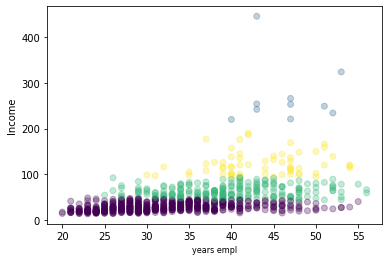

In [56]:
plt.scatter(Age,income, c=labels.astype(np.float), alpha=0.3)
plt.xlabel('years empl', fontsize=8)
plt.ylabel('Income', fontsize=10)

plt.show()


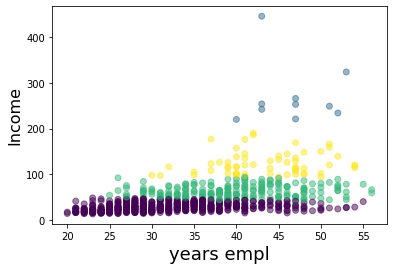

In [57]:
#area = np.pi * ( X[:, 1])**2  
plt.scatter(X[:, 0], X[:, 3], c=labels.astype(np.float), alpha=0.5)
plt.xlabel('years empl', fontsize=18)
plt.ylabel('Income', fontsize=16)

plt.show()


k-means will partition your customers into mutually exclusive groups, for example, into 3 clusters. The customers in each cluster are similar to each other demographically.
Now we can create a profile for each group, considering the common characteristics of each cluster. 
For example, the 3 clusters can be:

- AFFLUENT, EDUCATED AND OLD AGED
- MIDDLE AGED AND MIDDLE INCOME
- YOUNG AND LOW INCOME